<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/step_by_step_AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Then you can open the uploaded file using the filename `fn`
  with open(fn, 'rb') as f:
    # Do something with the file
    !unzip {fn}
    pass


Saving Q1 Dataset.zip to Q1 Dataset.zip
User uploaded file "Q1 Dataset.zip" with length 12845103 bytes
unzip:  cannot find or open Q1, Q1.zip or Q1.ZIP.


In [2]:
# Step 1: Import necessary libraries
import zipfile
import os

# Step 2: Unzip the uploaded file
zip_path = 'Q1 Dataset.zip'
extract_to = '/content'  # This is the default directory in Colab

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Step 3: List the extracted files (optional, for verification)
extracted_files = os.listdir(extract_to)
print("Extracted files:", extracted_files)


Extracted files: ['.config', 'Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset', 'Q1 Dataset.zip', 'sample_data']


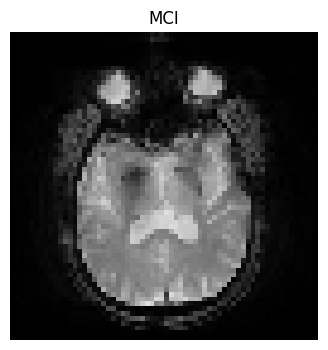

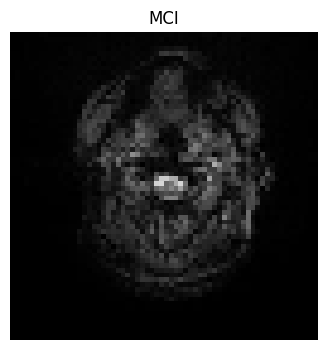

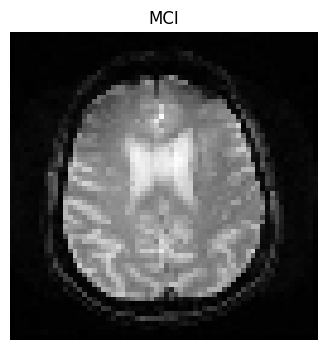

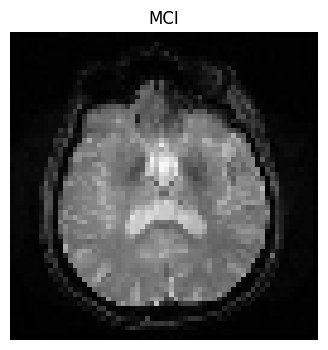

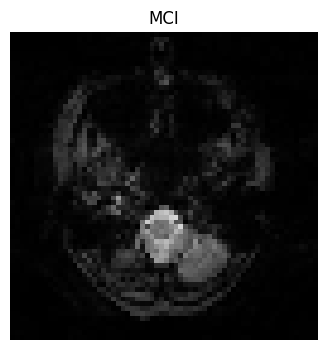

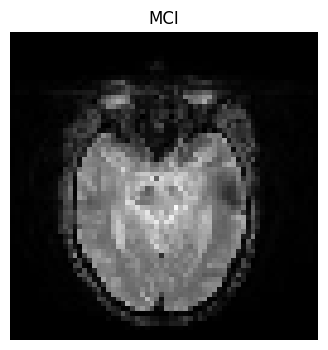

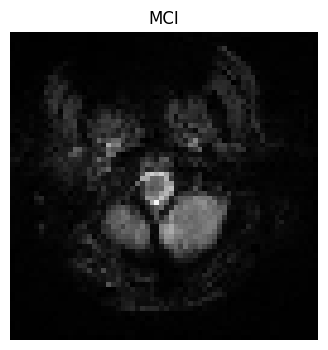

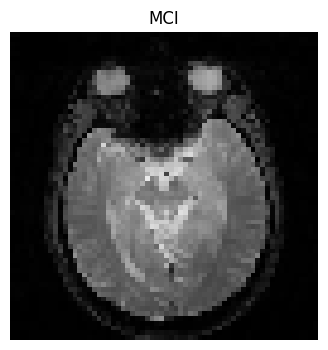

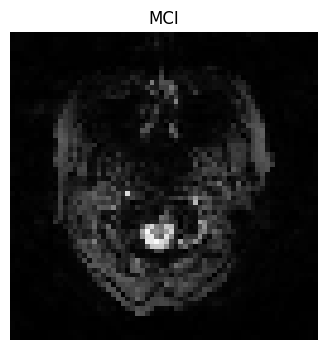

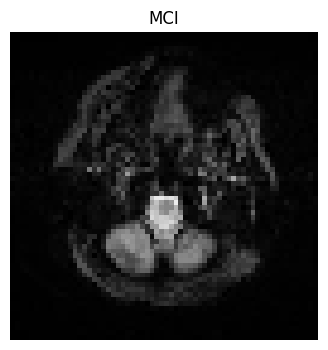

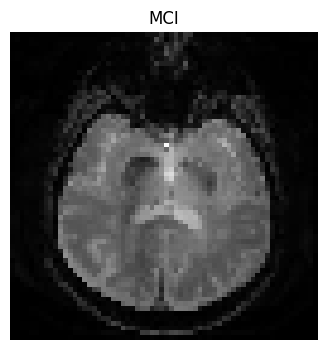

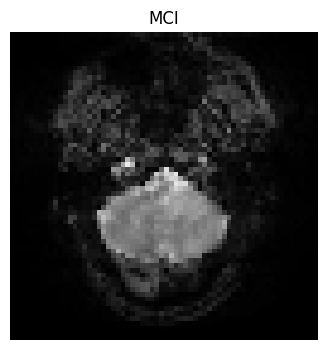

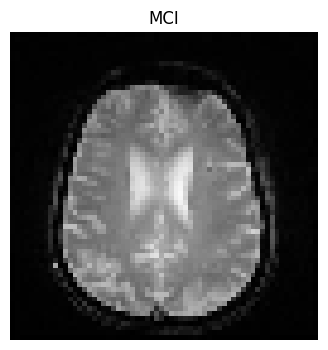

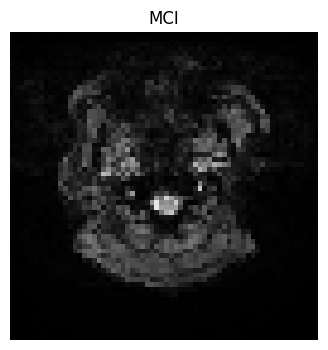

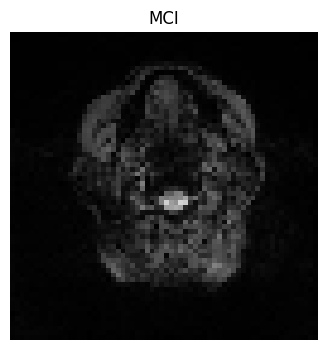

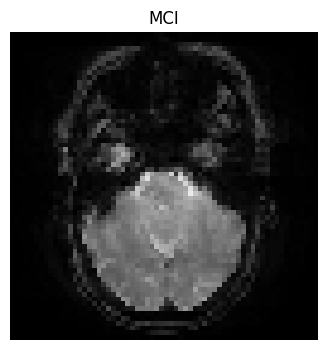

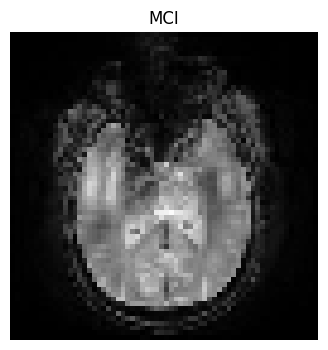

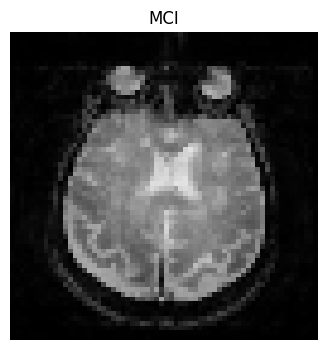

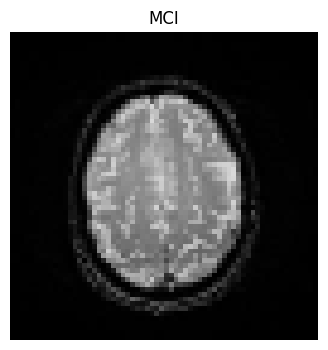

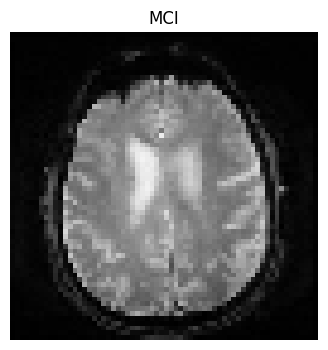

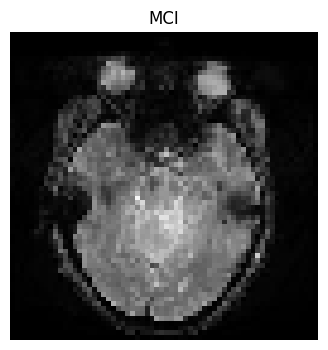

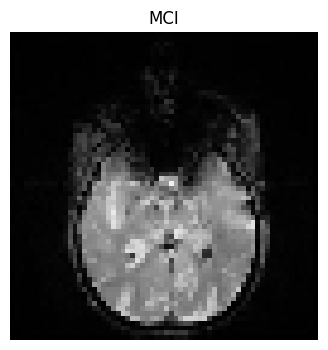

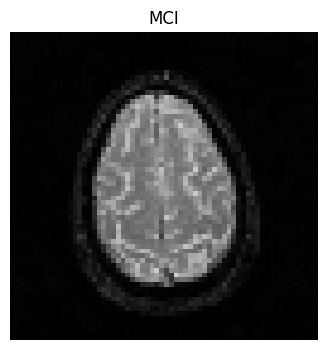

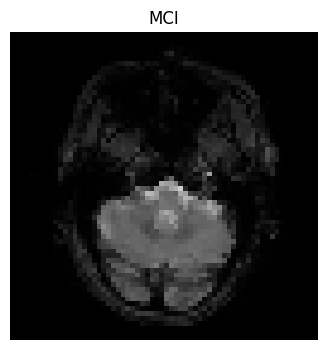

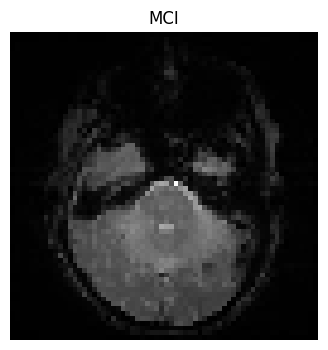

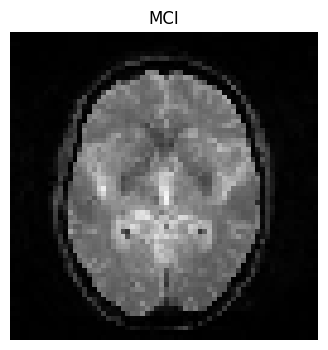

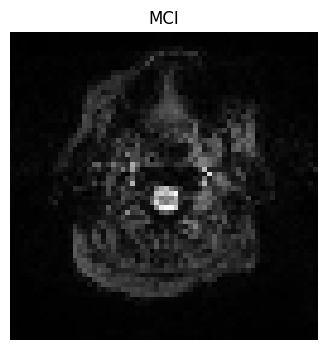

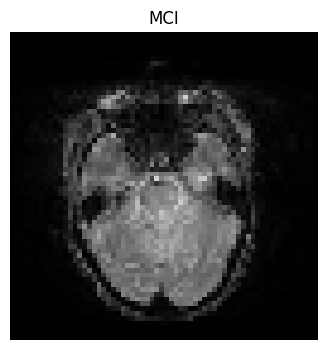

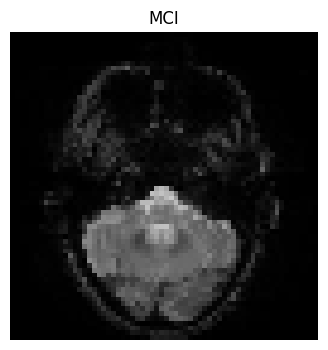

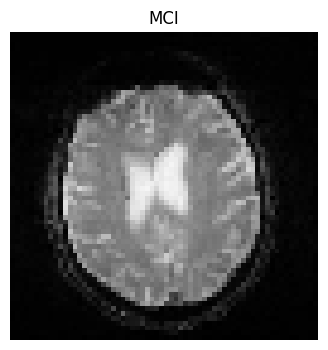

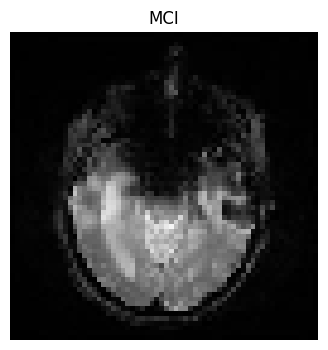

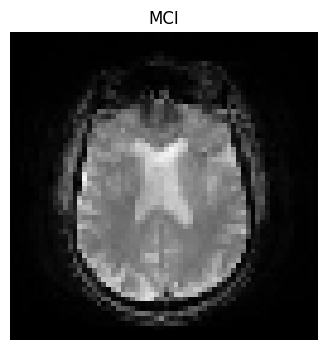

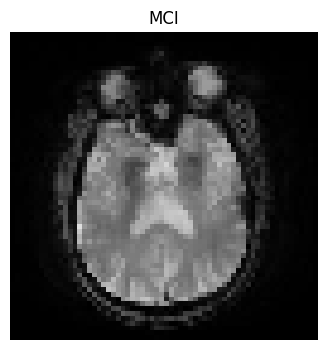

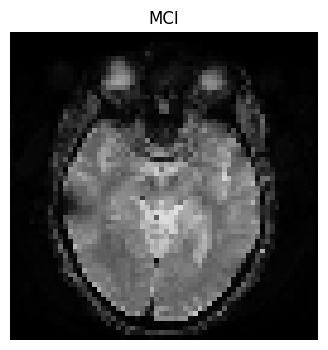

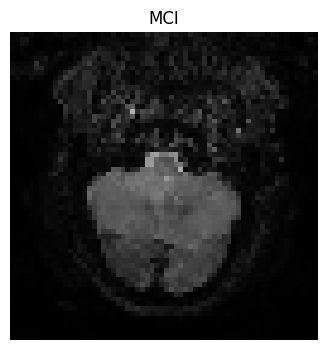

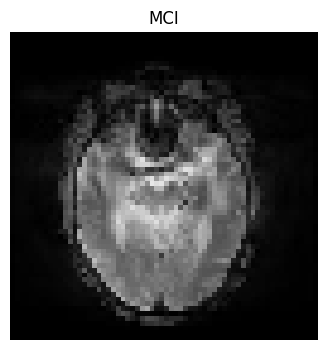

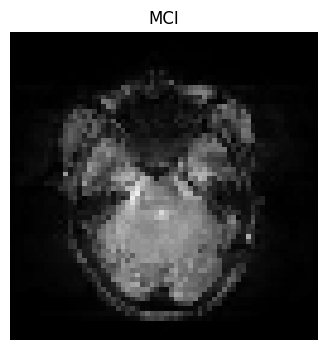

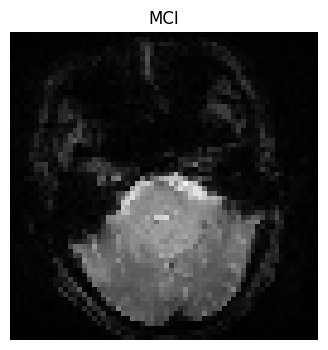

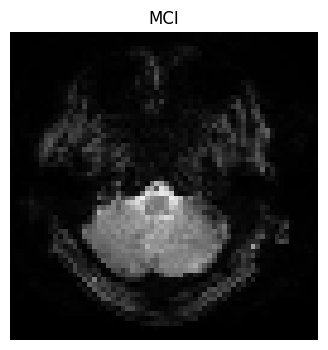

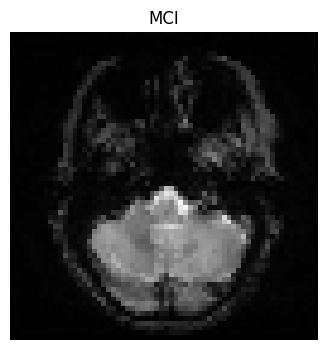

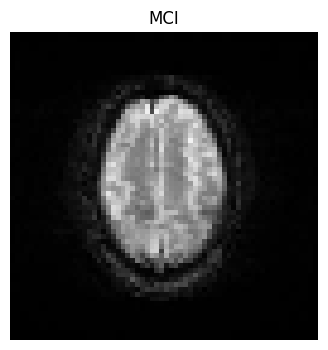

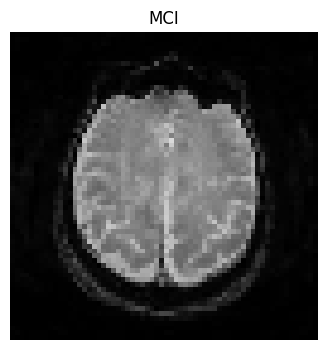

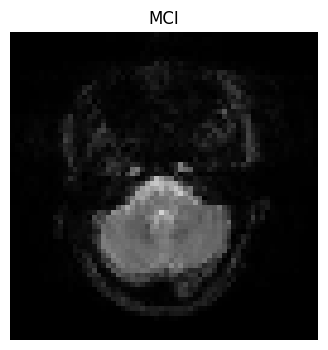

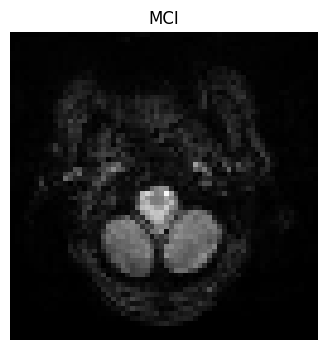

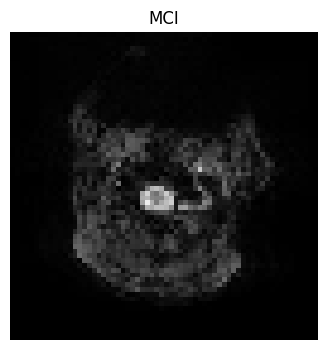

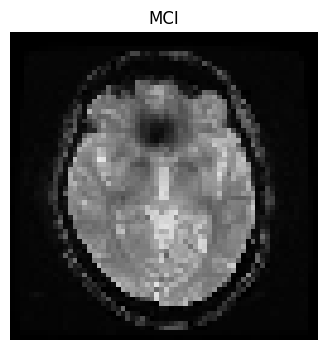

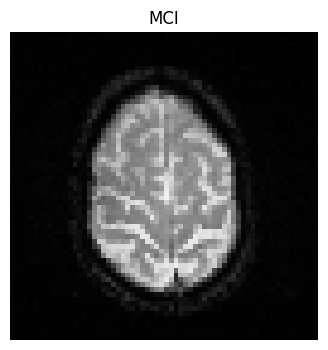

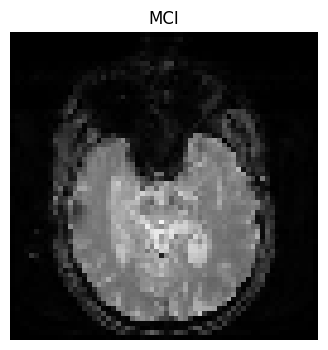

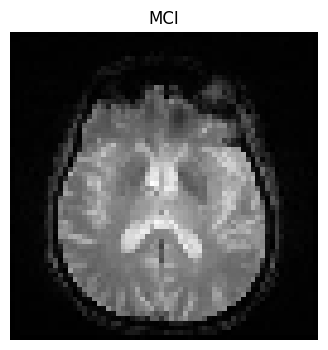

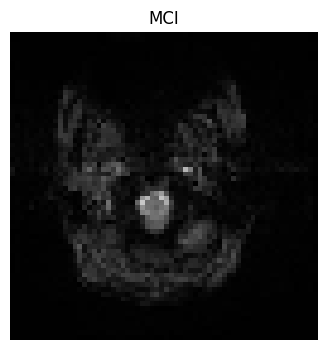

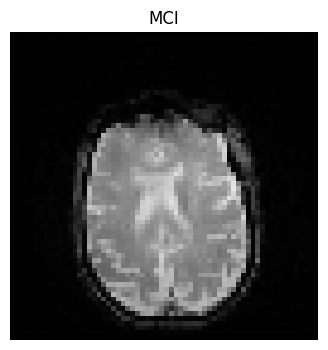

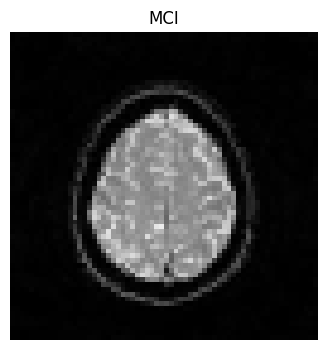

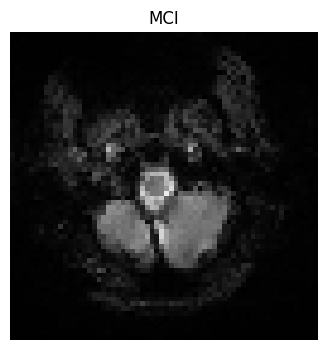

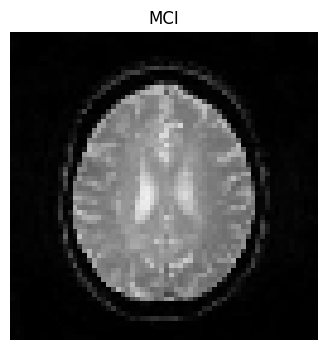

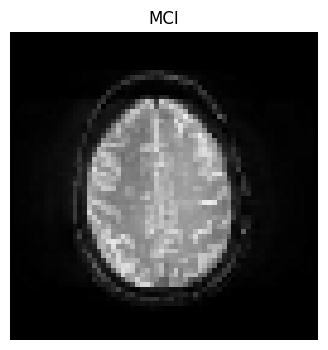

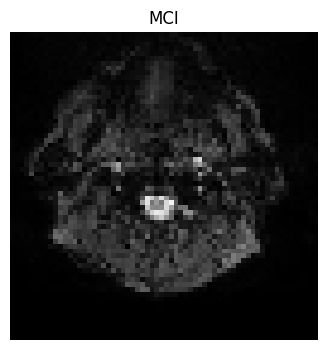

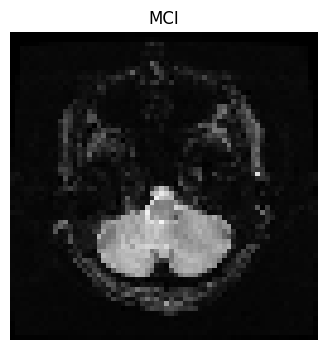

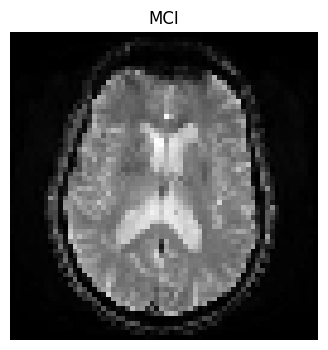

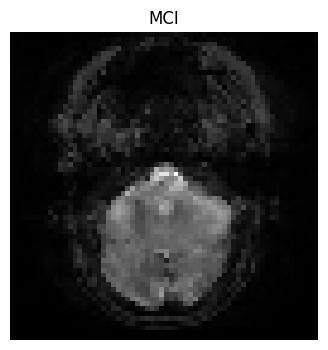

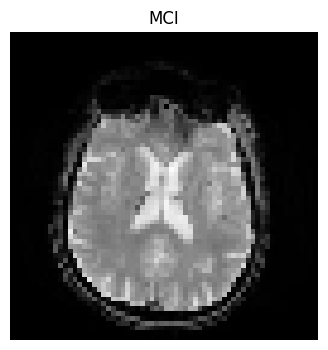

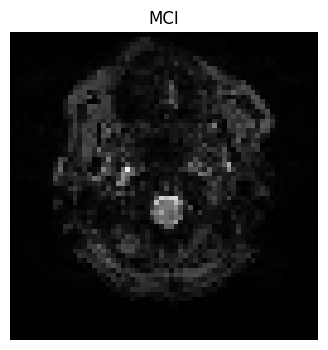

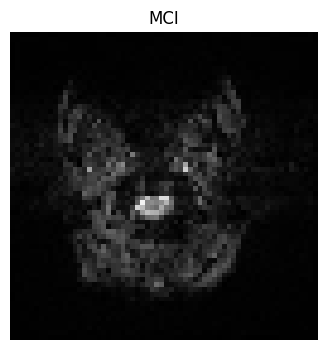

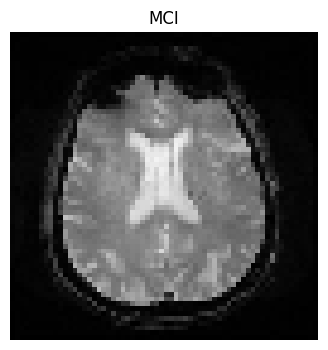

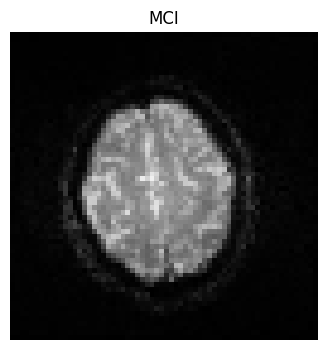

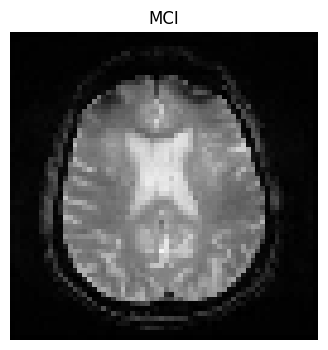

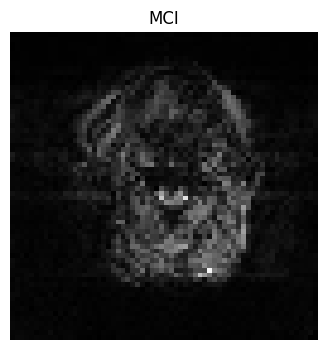

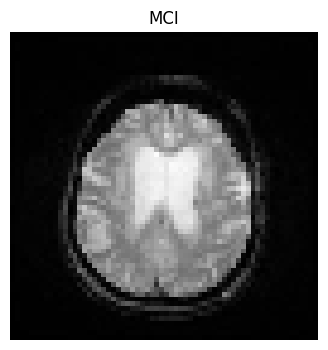

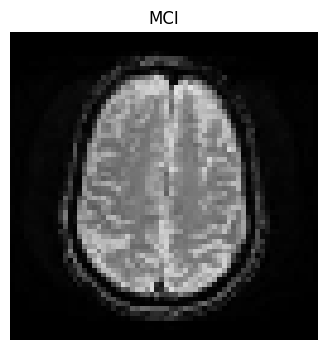

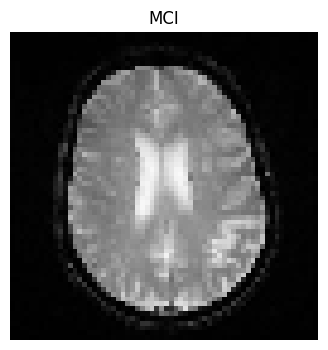

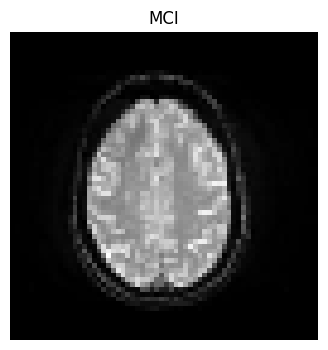

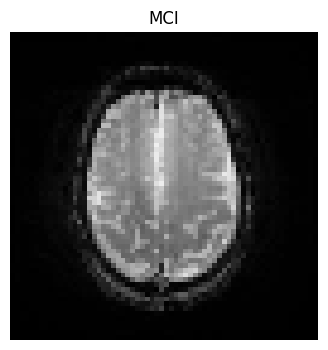

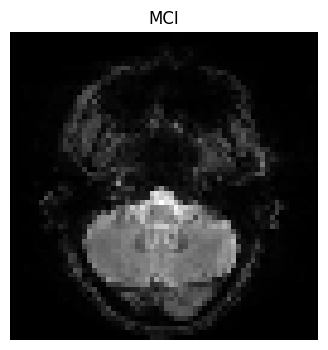

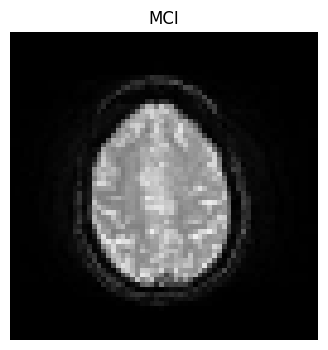

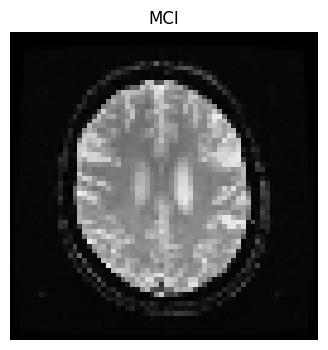

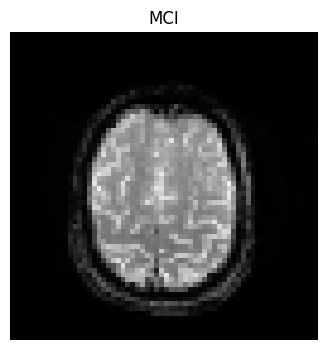

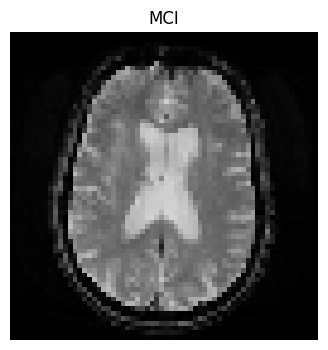

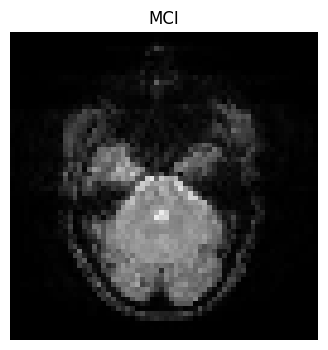

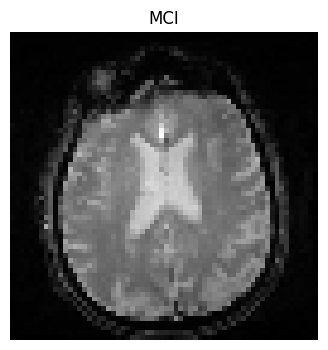

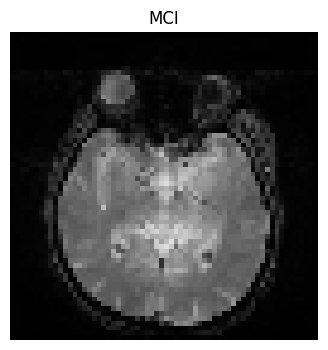

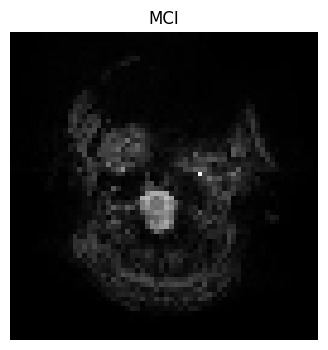

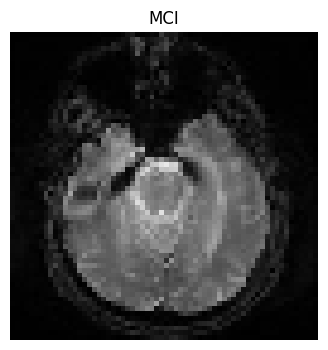

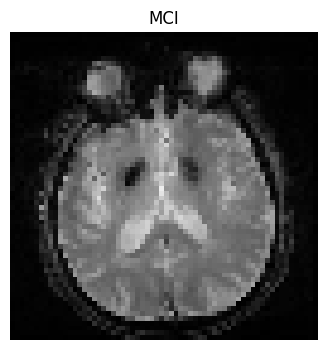

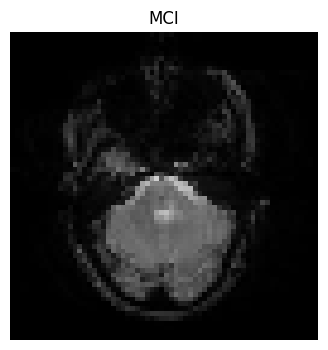

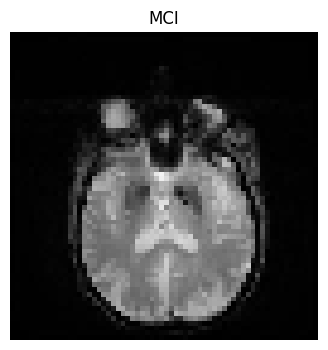

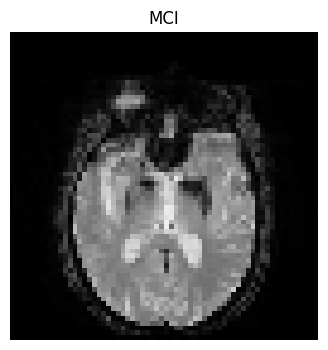

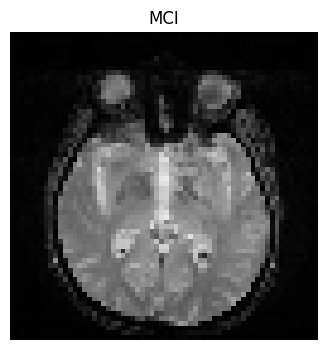

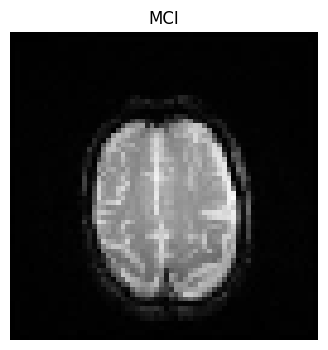

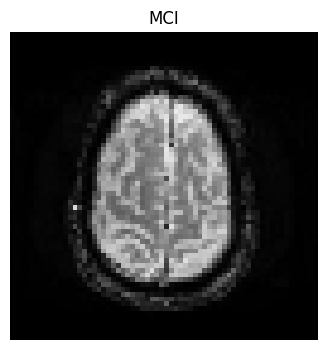

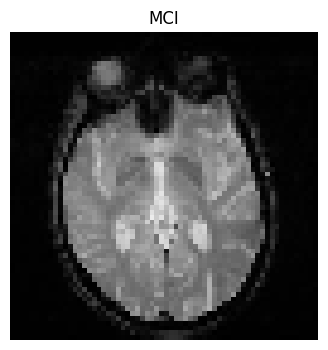

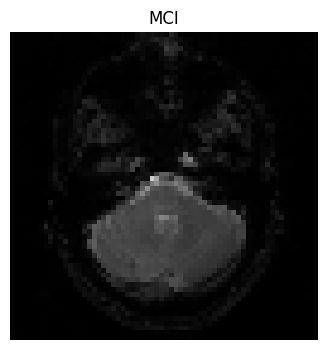

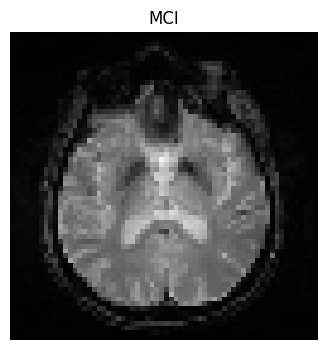

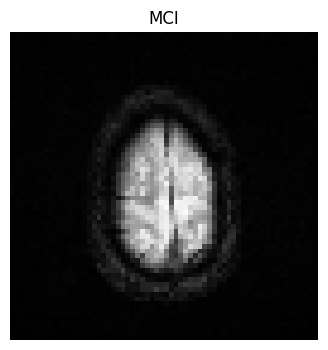

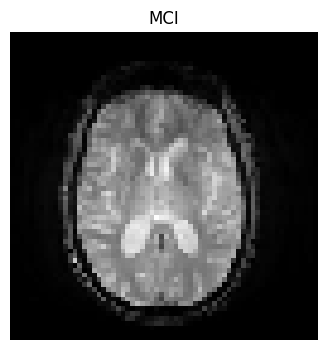

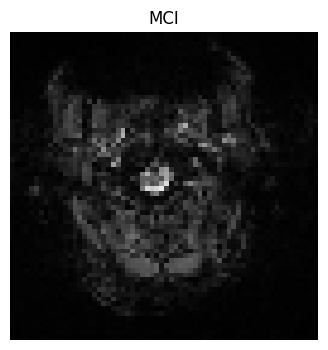

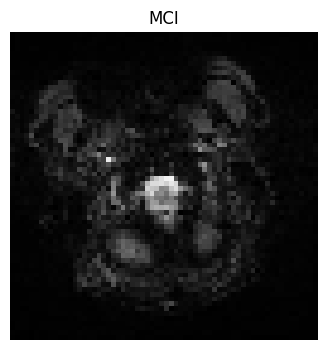

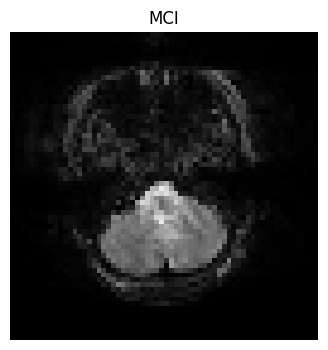

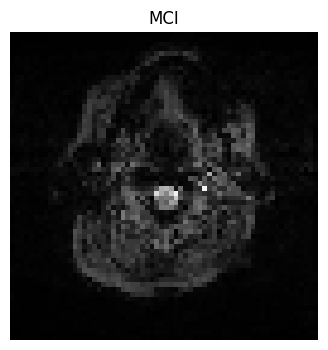

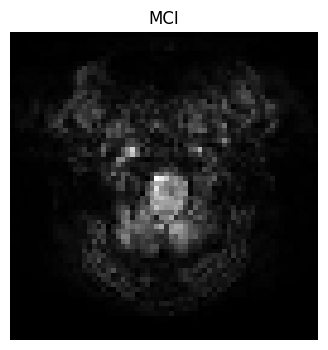

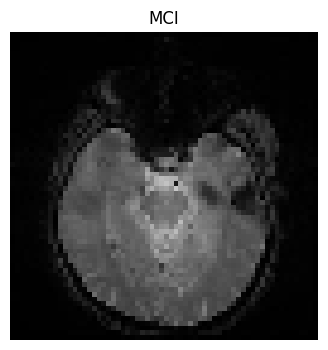

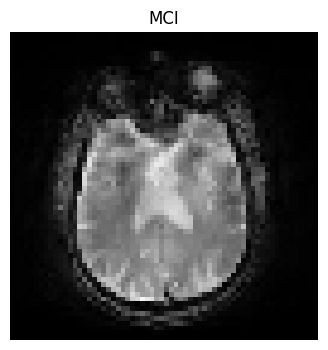

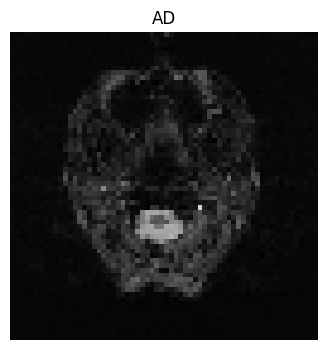

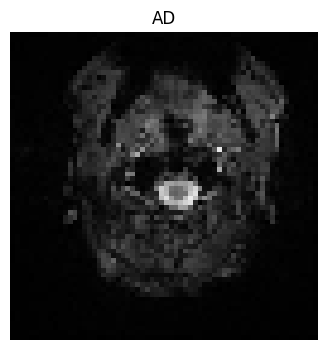

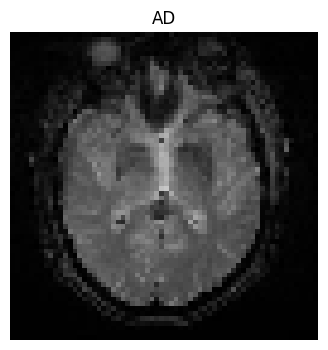

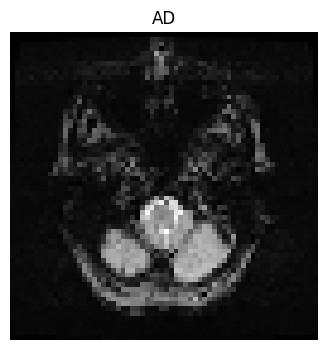

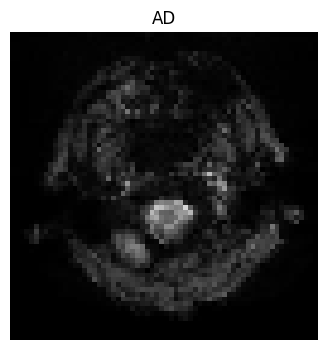

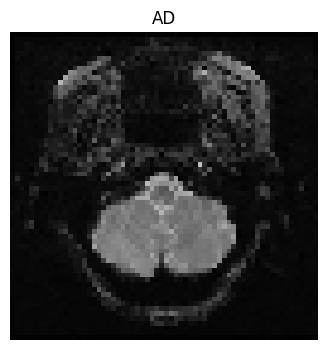

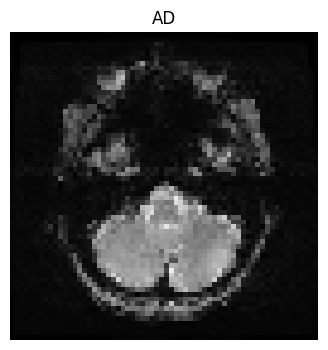

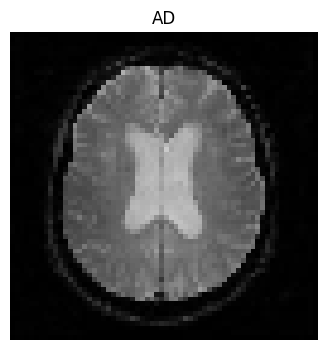

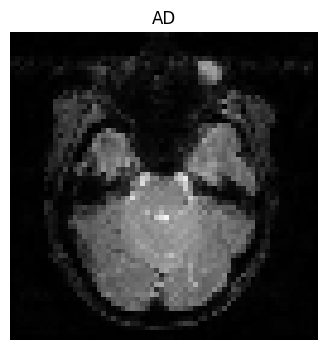

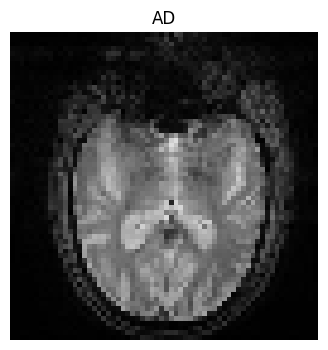

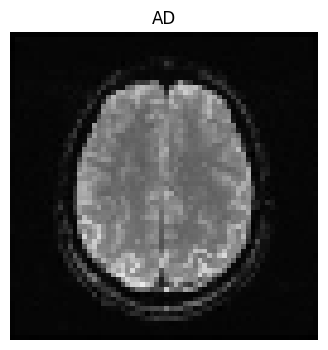

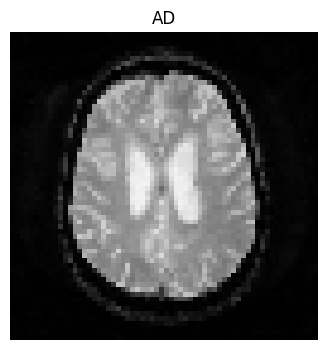

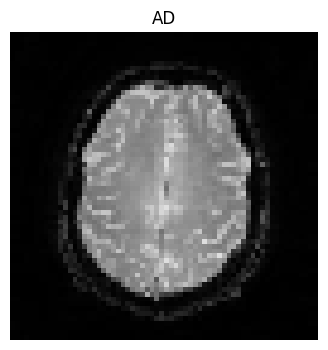

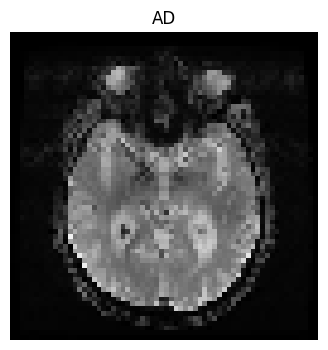

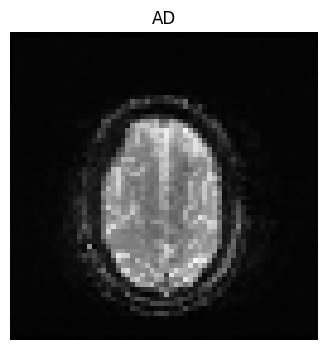

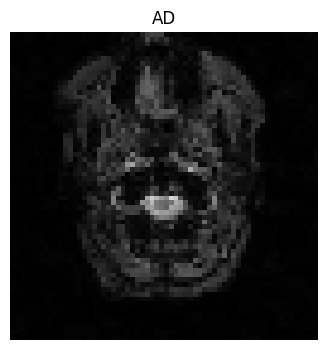

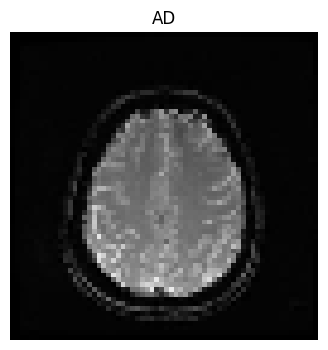

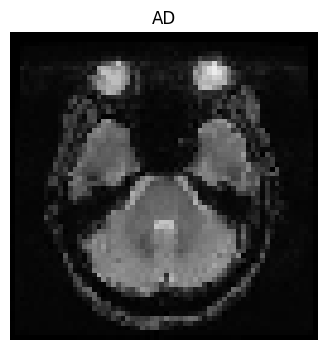

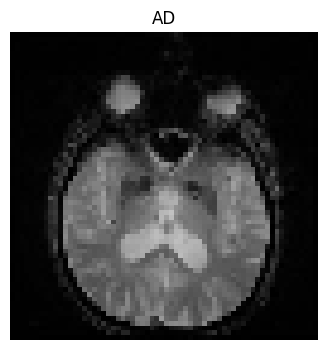

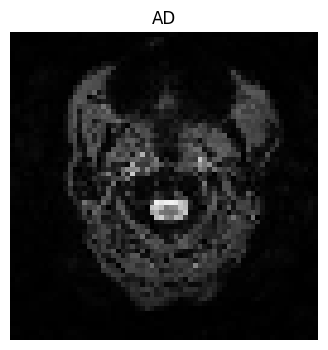

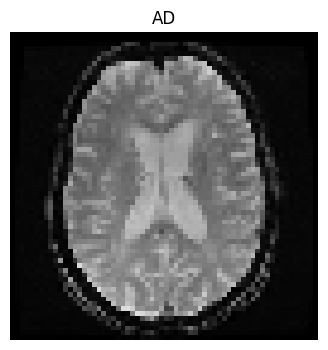

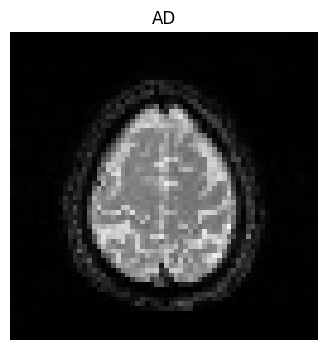

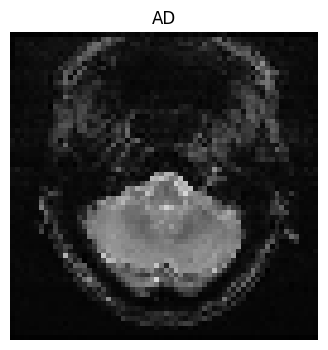

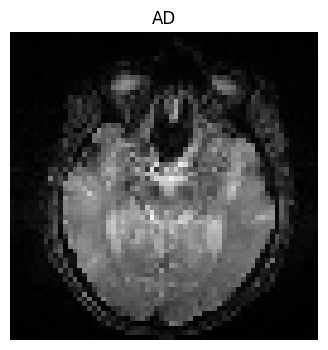

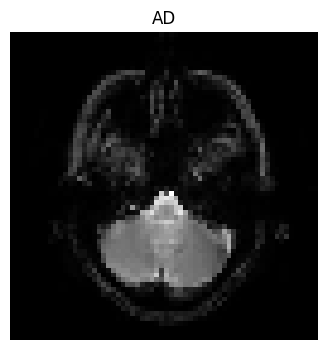

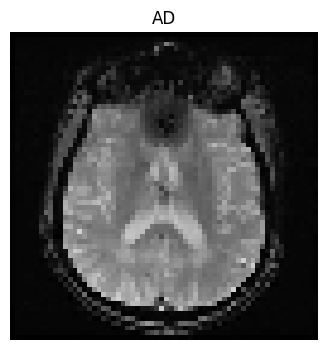

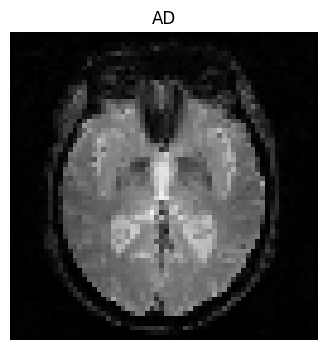

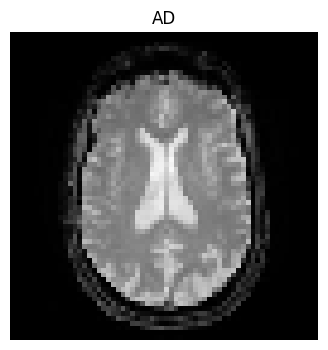

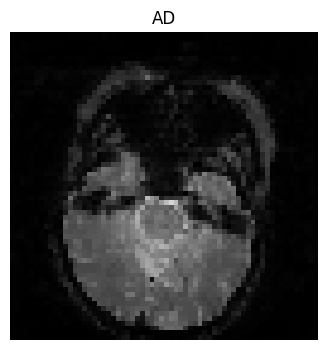

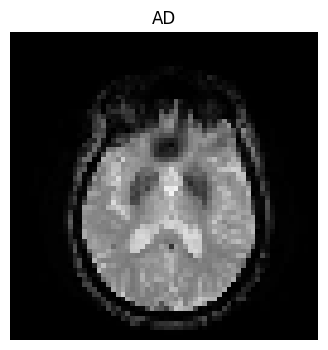

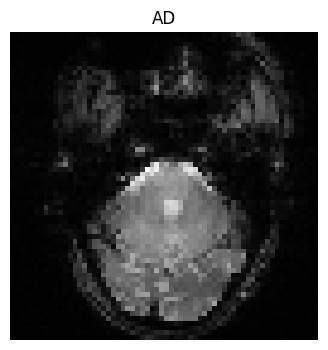

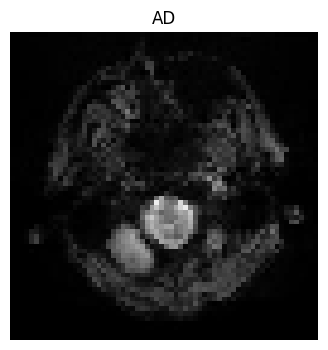

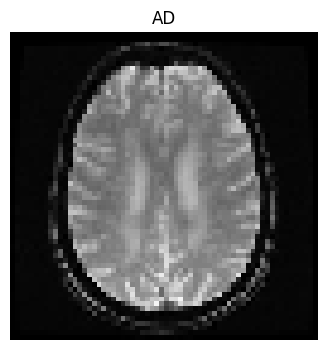

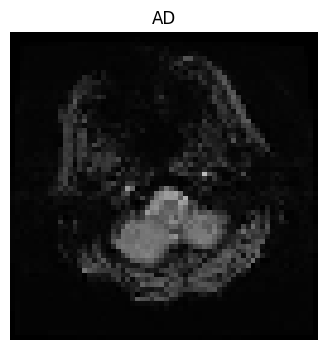

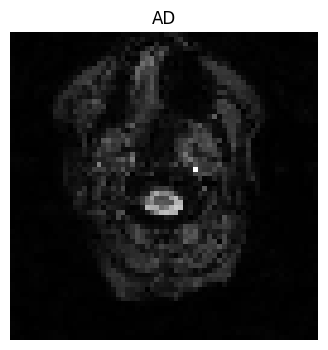

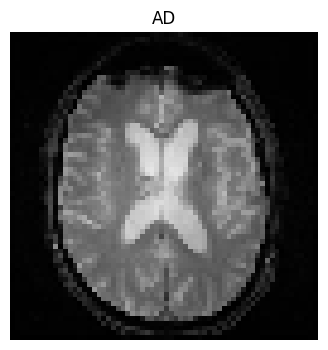

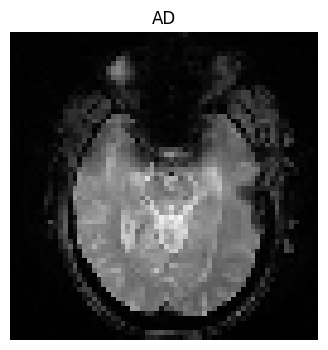

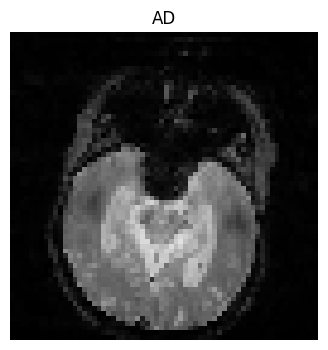

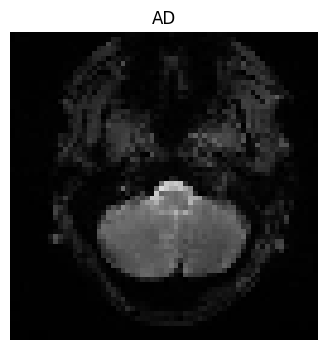

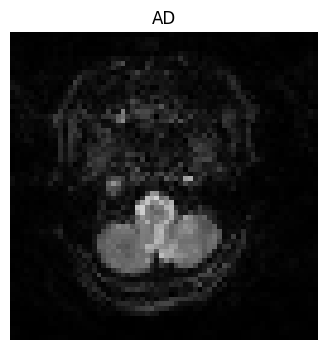

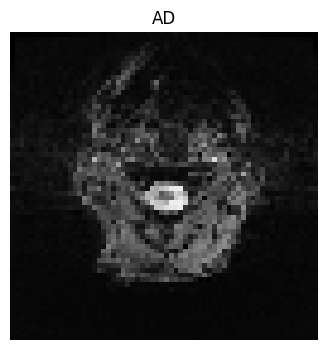

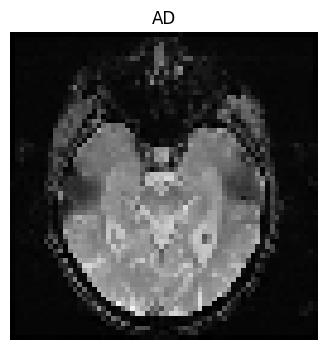

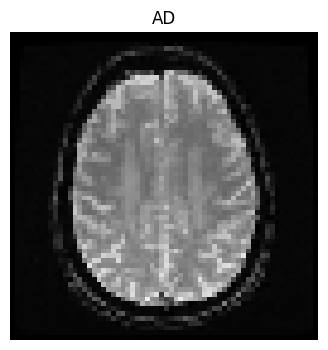

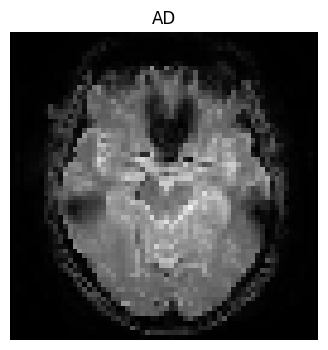

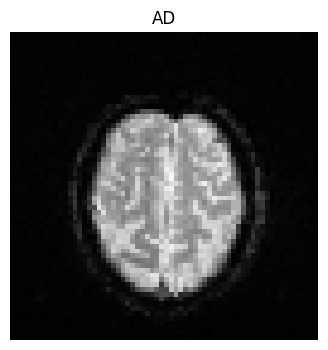

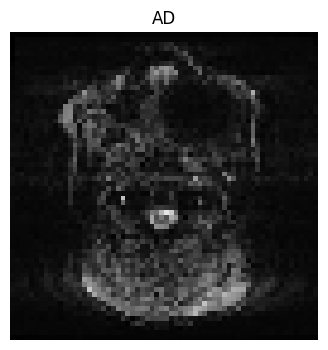

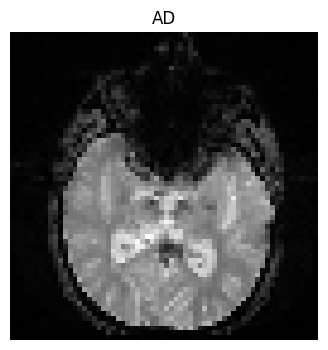

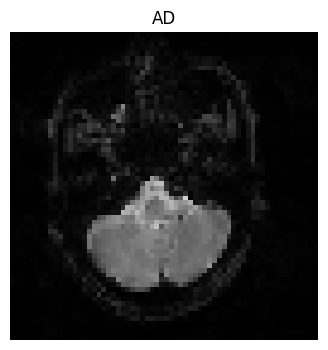

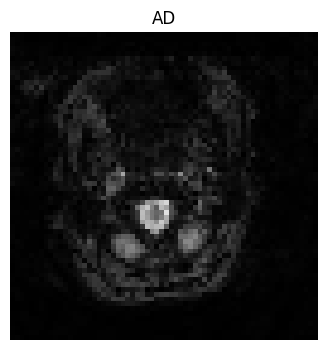

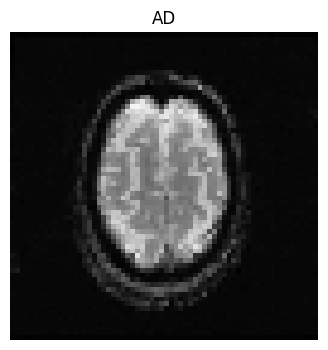

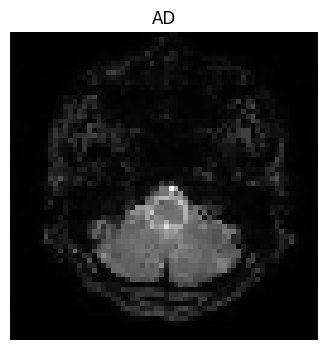

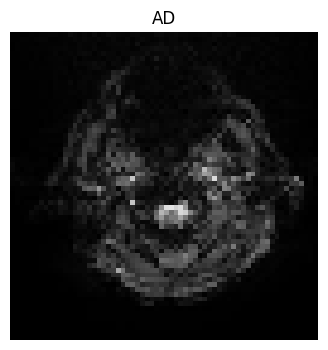

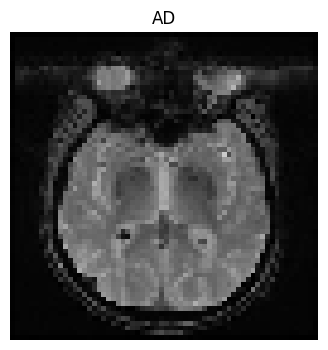

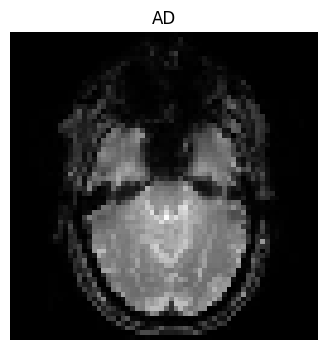

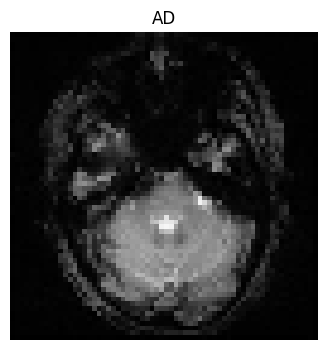

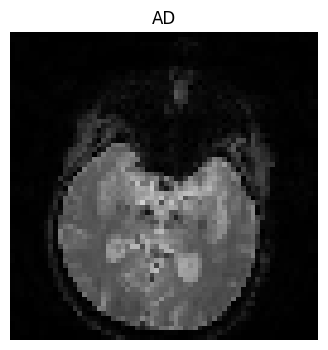

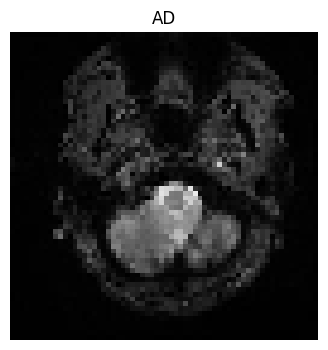

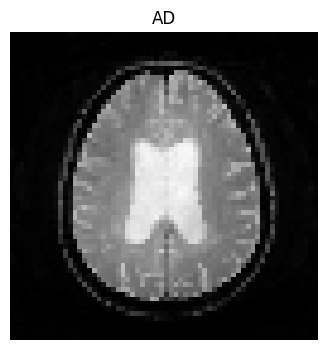

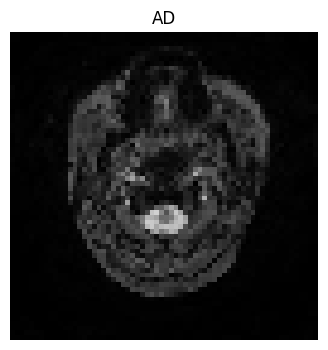

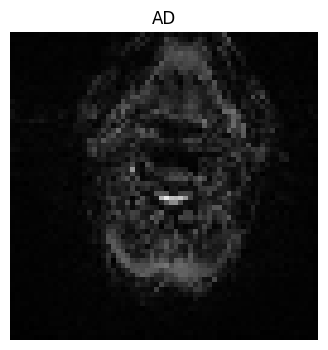

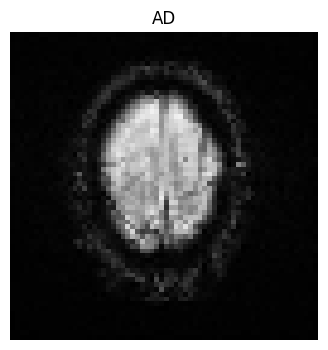

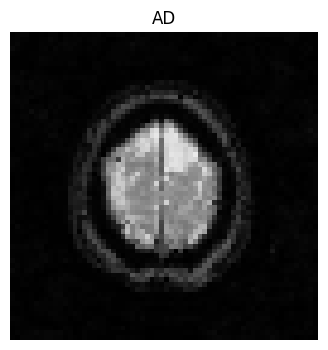

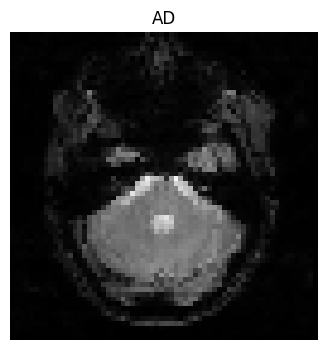

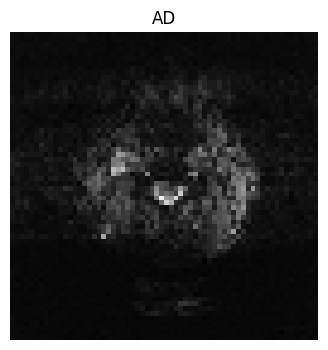

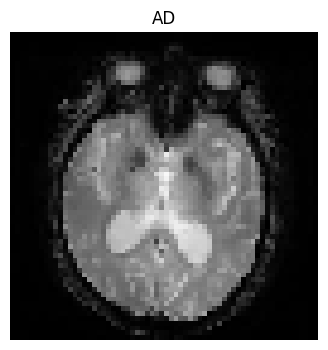

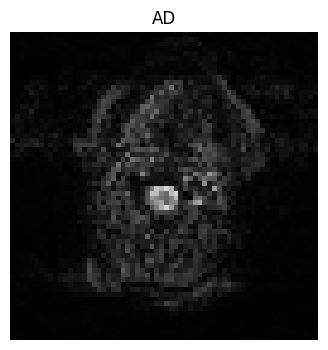

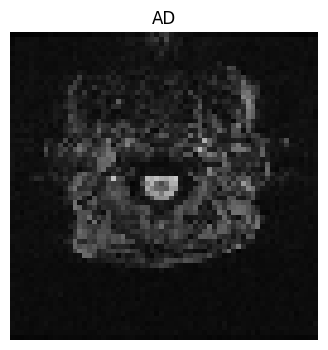

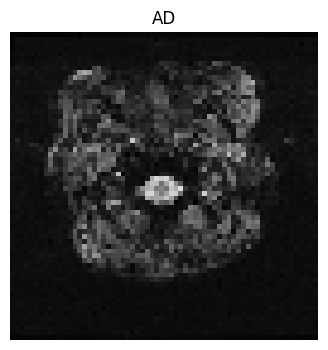

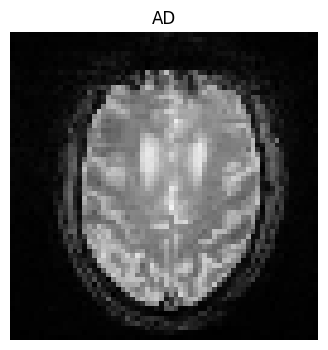

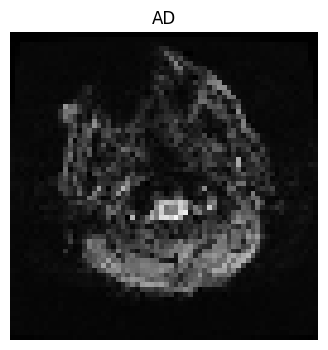

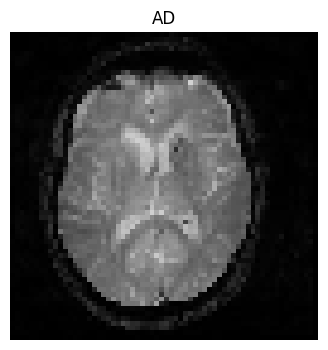

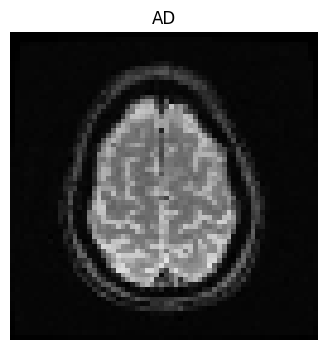

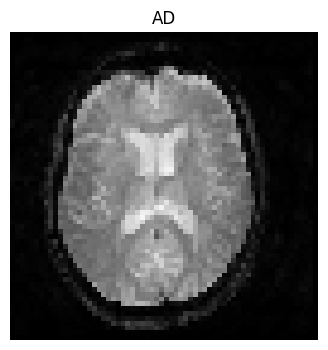

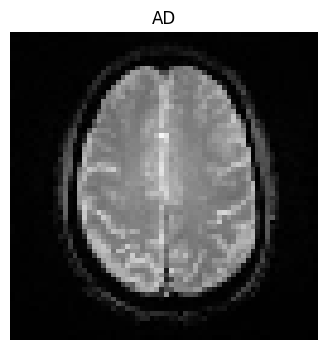

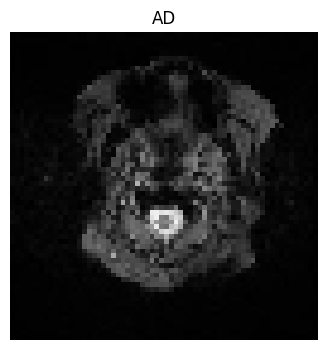

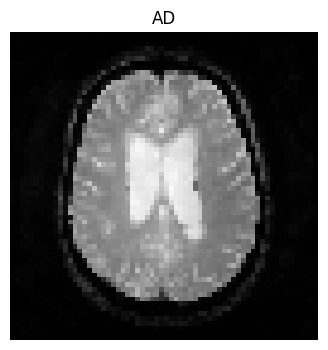

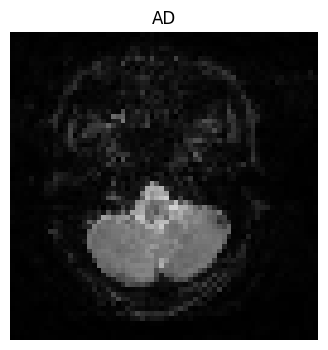

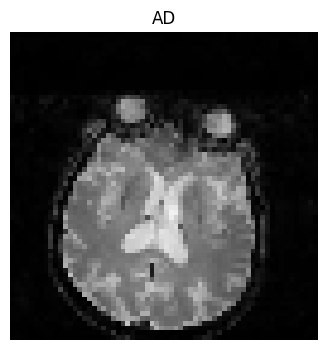

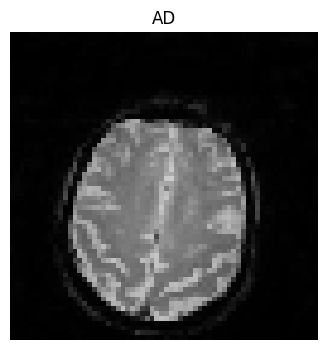

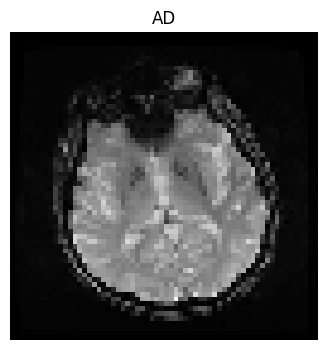

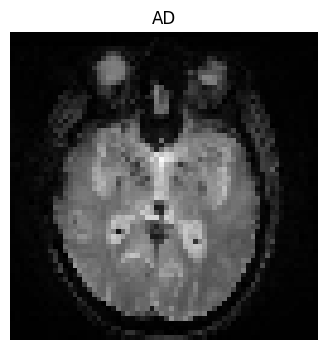

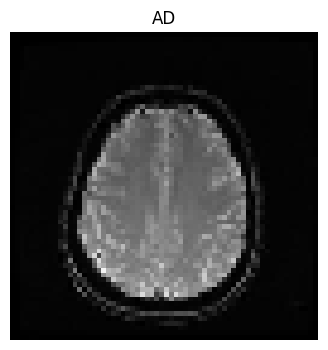

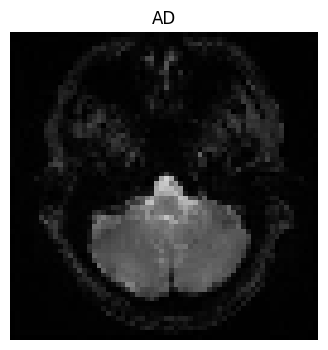

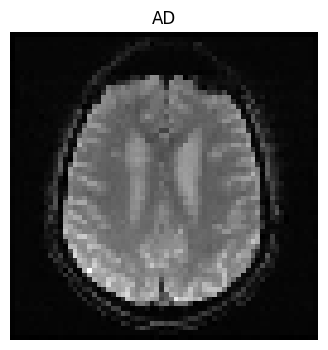

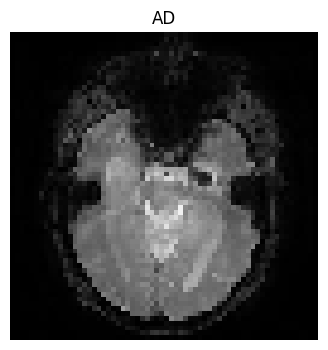

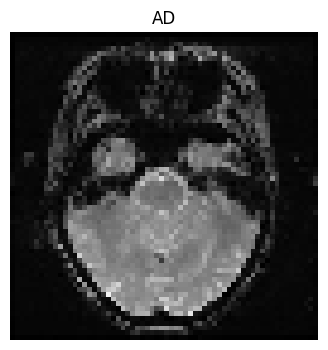

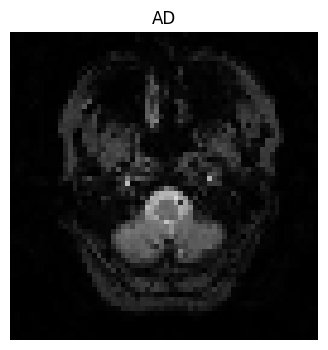

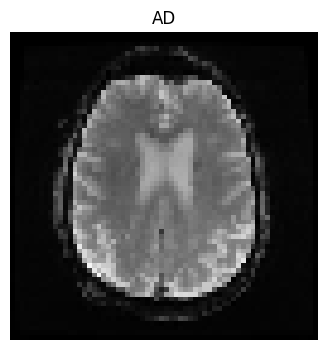

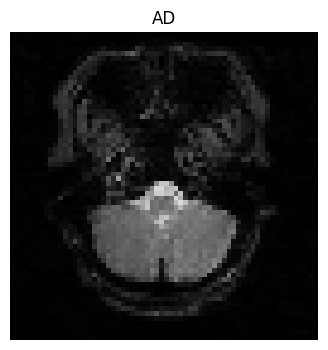

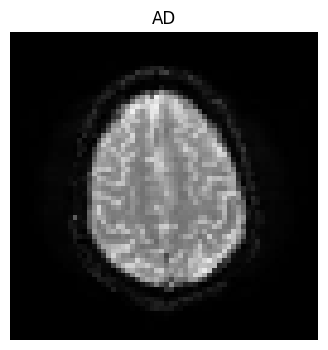

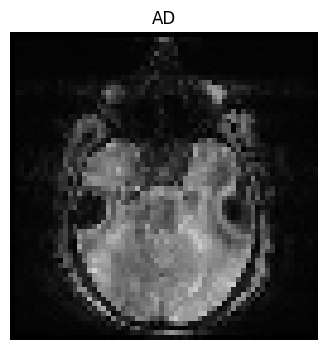

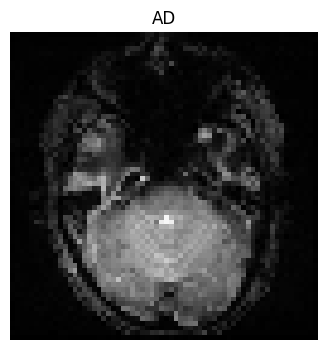

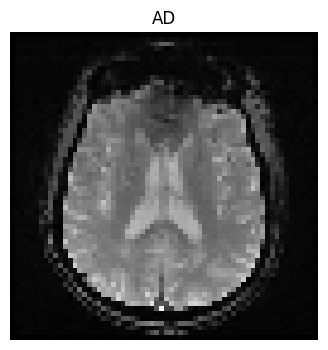

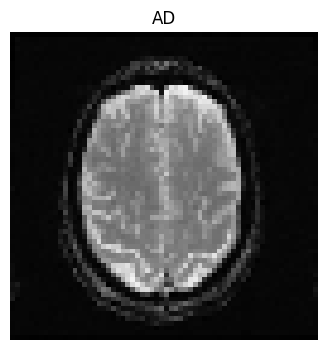

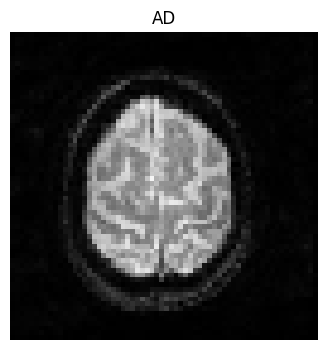

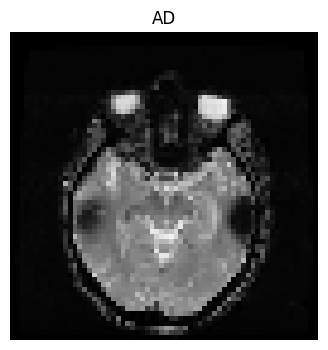

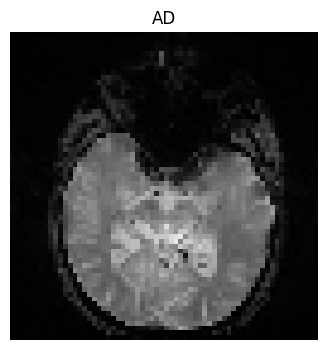

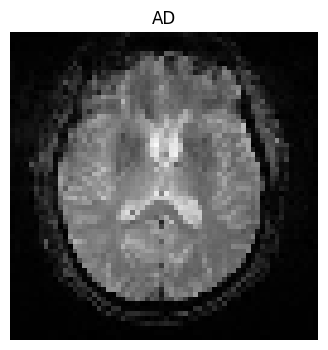

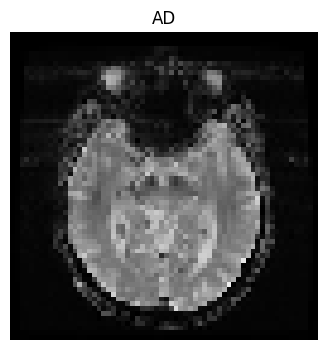

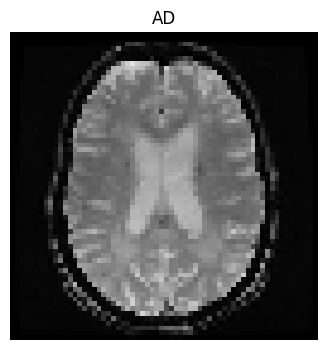

In [3]:
# Step 1: Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Step 2: Define the function to load data
def load_data(data_dir, target_size=(64, 64)):
    images, labels = [], []
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):  # Ensure it's a directory
            for image_file in os.listdir(label_dir):
                if image_file.endswith('.jpg'):  # Ensure it's a JPEG file
                    image_path = os.path.join(label_dir, image_file)
                    image = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
                    image = tf.keras.preprocessing.image.img_to_array(image)
                    images.append(image)
                    labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Step 3: Define the path to the dataset folder
data_dir = os.path.join('/content', 'Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset')

# Step 4: Load the data
images, labels = load_data(data_dir)

# Step 5: Convert labels to one-hot encoding
labels = np.where(labels == 'AD', 1, 0)
one_hot = np.zeros((labels.shape[0], 2))
one_hot[np.arange(labels.shape[0]), labels] = 1
labels = one_hot

# Step 6: Display 100 images from each category
def display_images_with_labels(images, labels, num_images=100):
    mci_indices = np.where(labels[:, 0] == 1)[0]
    ad_indices = np.where(labels[:, 1] == 1)[0]

    # Display MCI images
    for i, idx in enumerate(mci_indices[:num_images]):
        plt.figure(figsize=(4, 4))
        plt.imshow(images[idx].astype('uint8'))
        plt.title('MCI')
        plt.axis('off')
        plt.show()

    # Display AD images
    for i, idx in enumerate(ad_indices[:num_images]):
        plt.figure(figsize=(4, 4))
        plt.imshow(images[idx].astype('uint8'))
        plt.title('AD')
        plt.axis('off')
        plt.show()

display_images_with_labels(images, labels)

The term "one-hot encoding" is used to convert categorical labels into a format that can be provided to machine learning algorithms to do a better job in prediction.

Here's a step-by-step explanation of how one-hot encoding is applied in this code:

1. **Label Conversion**: The original labels are categorical strings, either 'AD' (Alzheimer's Disease) or something else (which is assumed to be 'MCI' for Mild Cognitive Impairment in this context, although the code does not explicitly mention 'MCI'). The line `labels = np.where(labels == 'AD', 1, 0)` converts these categorical labels into numerical labels: 'AD' becomes 1 and 'MCI' (or any other label) becomes 0.

2. **One-Hot Encoding**: After converting the labels to 0 and 1, the code creates a new array `one_hot` with the shape `(labels.shape[0], 2)`, where `labels.shape[0]` is the number of samples, and 2 is the number of unique categories (AD and MCI). This array is initialized with zeros.

3. **Setting the One-Hot Values**: The line `one_hot[np.arange(labels.shape[0]), labels] = 1` sets the appropriate positions in the `one_hot` array to 1. Here's how it works:
   - `np.arange(labels.shape[0])` generates an array of indices from 0 to the number of samples.
   - `labels` is the array of 0s and 1s from the previous step.
   - For each sample index, the corresponding value in `labels` (either 0 or 1) indicates which column in the `one_hot` array should be set to 1. If the label is 0, the first column is set to 1 (indicating 'MCI'), and if the label is 1, the second column is set to 1 (indicating 'AD').

4. **Result**: The resulting `one_hot` array has a shape of `(number_of_samples, 2)`, where each row is a one-hot encoded vector representing the original categorical label. For example, if a sample was originally labeled 'AD', its one-hot encoded vector would be `[0, 1]`, and if it was labeled 'MCI', it would be `[1, 0]`.

This one-hot encoded format is useful for machine learning algorithms that require numerical input, as it allows the algorithm to understand that the two values are distinct categories without implying any ordinal relationship between them.